In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
# First function to optimize
def function1(x):
    return -x**2

# Second function to optimize
def function2(x):
    return -(x-2)**2

In [3]:
# Function to find the index of a value in a list
def index_of(a, list):
    try:
        return list.index(a)
    except ValueError:
        return -1

# Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    values_copy = values[:]
    while len(sorted_list) != len(list1):
        min_index = index_of(min(values_copy), values_copy)
        if min_index in list1:
            sorted_list.append(min_index)
        values_copy[min_index] = math.inf
    return sorted_list

In [4]:
# Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S = [[] for _ in range(len(values1))]
    front = [[]]
    n = [0 for _ in range(len(values1))]
    rank = [0 for _ in range(len(values1))]

    for p in range(len(values1)):
        S[p] = []
        n[p] = 0
        for q in range(len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or \
               (values1[p] >= values1[q] and values2[p] > values2[q]) or \
               (values1[p] > values1[q] and values2[p] >= values2[q]):
                S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or \
                 (values1[q] >= values1[p] and values2[q] > values2[p]) or \
                 (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] += 1
        if n[p] == 0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while front[i]:
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    rank[q] = i + 1
                    if q not in Q:
                        Q.append(q)
        i += 1
        front.append(Q)
    del front[-1]
    return front

In [5]:
# Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for _ in range(len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = distance[-1] = float('inf')
    for k in range(1, len(front) - 1):
        distance[k] += (values1[sorted1[k + 1]] - values1[sorted1[k - 1]]) / (max(values1) - min(values1))
        distance[k] += (values2[sorted2[k + 1]] - values2[sorted2[k - 1]]) / (max(values2) - min(values2))
    return distance

In [6]:
# Function to carry out the crossover
def crossover(a, b):
    r = random.random()
    if r > 0.5:
        return mutation((a + b) / 2)
    else:
        return mutation((a - b) / 2)

# Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob < 0.1:
        solution = min_x + (max_x - min_x) * random.random()
    return solution

In [7]:
# Main program starts here
pop_size = 20
max_gen = 50

# Initialization
min_x = -55
max_x = 55
solution = [min_x + (max_x - min_x) * random.random() for _ in range(pop_size)]
gen_no = 0

# Tracking progress for visualization
progress = []

In [8]:
while gen_no < max_gen:
    function1_values = [function1(solution[i]) for i in range(pop_size)]
    function2_values = [function2(solution[i]) for i in range(pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:], function2_values[:])
    print(f"The best front for Generation number {gen_no} is")
    for value in non_dominated_sorted_solution[0]:
        print(round(solution[value], 3), end=" ")
    print("\n")

    # Store progress for visualization
    progress.append((function1_values, function2_values))

    crowding_distance_values = []
    for i in range(len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:], function2_values[:], non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]

    # Generating offsprings
    while len(solution2) != 2 * pop_size:
        a1 = random.randint(0, pop_size - 1)
        b1 = random.randint(0, pop_size - 1)
        solution2.append(crossover(solution[a1], solution[b1]))

    function1_values2 = [function1(solution2[i]) for i in range(2 * pop_size)]
    function2_values2 = [function2(solution2[i]) for i in range(2 * pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:], function2_values2[:])
    crowding_distance_values2 = []
    for i in range(len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:], function2_values2[:], non_dominated_sorted_solution2[i][:]))

    new_solution = []
    for i in range(len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j], non_dominated_sorted_solution2[i]) for j in range(len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if len(new_solution) == pop_size:
                break
        if len(new_solution) == pop_size:
            break
    solution = [solution2[i] for i in new_solution]
    gen_no += 1

The best front for Generation number 0 is
2.407 

The best front for Generation number 1 is
2.407 2.407 

The best front for Generation number 2 is
2.407 2.407 0.855 2.407 0.0 1.062 

The best front for Generation number 3 is
0.855 0.855 1.062 0.0 0.0 0.644 1.204 0.87 0.0 1.835 0.423 0.965 

The best front for Generation number 4 is
0.855 0.855 0.644 0.0 0.0 1.835 0.0 1.204 1.062 0.966 0.965 0.855 1.24 0.0 1.631 1.794 0.889 0.596 0.87 0.423 

The best front for Generation number 5 is
0.855 0.855 0.0 0.0 0.0 1.835 0.644 0.855 0.855 0.966 1.24 1.299 0.965 1.204 0.13 0.872 0.123 0.91 0.91 0.533 

The best front for Generation number 6 is
0.855 0.855 0.855 1.299 0.965 0.0 0.872 1.835 0.0 0.0 0.13 0.055 0.123 1.204 0.028 0.966 0.192 0.533 0.855 1.24 

The best front for Generation number 7 is
0.855 0.855 0.855 0.192 0.966 0.13 0.055 0.0 0.965 1.251 1.204 0.918 0.872 0.0 0.0 1.299 0.123 0.222 1.835 0.075 

The best front for Generation number 8 is
0.855 0.855 0.855 0.123 0.222 0.0 0.872 0.05

In [ ]:
# Let's plot the final front
function1_values = [function1(solution[i]) for i in range(pop_size)]
function2_values = [function2(solution[i]) for i in range(pop_size)]

# Visualize the final front
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.title('Final Front')
plt.scatter(function1_values, function2_values)
plt.show()

# Visualize the progress over generations
for gen, (f1_vals, f2_vals) in enumerate(progress):
    plt.figure(figsize=(10, 6))
    plt.scatter(f1_vals, f2_vals)
    plt.xlabel('Function 1', fontsize=15)
    plt.ylabel('Function 2', fontsize=15)
    plt.title(f'Generation {gen}')
    plt.show()

Données chargées avec succès. 196 actifs trouvés.
Démarrage de l'optimisation...
Génération 10 terminée
Génération 20 terminée
Génération 30 terminée
Génération 40 terminée
Génération 50 terminée
Génération 60 terminée
Génération 70 terminée
Génération 80 terminée
Génération 90 terminée
Génération 100 terminée


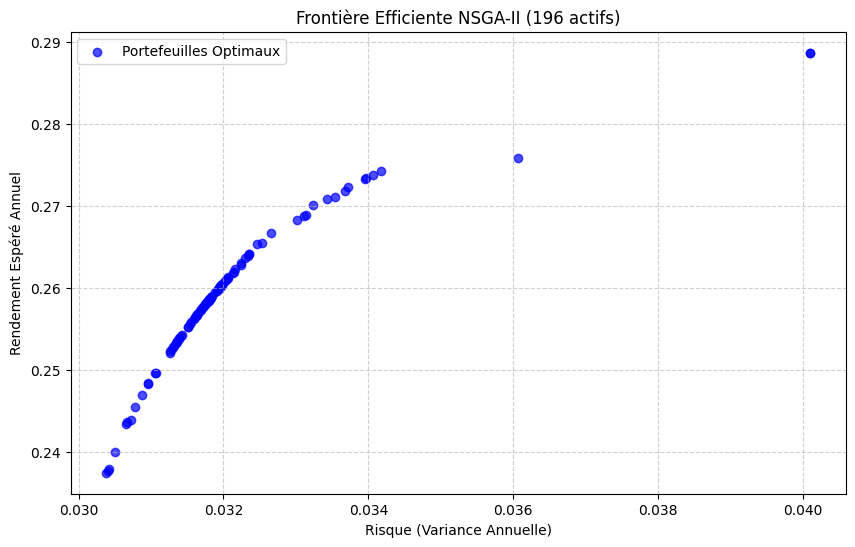

In [11]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CHARGEMENT DES DONNÉES BOURSIÈRES ---
JOURS_DE_BOURSE = 252

try:
    # On essaie de charger depuis un sous-dossier ou le dossier racine
    try:
        df_rendements = pd.read_csv("data/returns_final.csv", index_col="Date", parse_dates=True)
    except FileNotFoundError:
        df_rendements = pd.read_csv("returns_final.csv", index_col="Date", parse_dates=True)

    print(f"Données chargées avec succès. {df_rendements.shape[1]} actifs trouvés.")

    # Calcul des rendements espérés et de la matrice de covariance
    # .values est important pour convertir en tableau numpy pur pour les calculs matriciels
    MU = df_rendements.mean().values * JOURS_DE_BOURSE
    SIGMA = df_rendements.cov().values * JOURS_DE_BOURSE
    N_ASSETS = len(MU)

except FileNotFoundError:
    print("ERREUR : Le fichier 'returns_final.csv' est introuvable.")
    print("Génération de données aléatoires pour la démonstration...")
    N_ASSETS = 5
    MU = np.random.rand(N_ASSETS) * 0.2
    SIGMA = np.random.rand(N_ASSETS, N_ASSETS)
    SIGMA = np.dot(SIGMA, SIGMA.transpose()) * 0.05 # Pour faire une matrice symétrique définie positive

# --- 2. DÉFINITION DES OBJECTIFS ---

# Objectif 1 : Minimiser le Risque (Variance)
def function1_risk(w):
    return np.dot(w.T, np.dot(SIGMA, w))

# Objectif 2 : Maximiser le Rendement (Minimiser l'opposé)
def function2_neg_return(w):
    return -np.dot(w, MU)

# --- 3. FONCTIONS UTILITAIRES NSGA-II ---

def index_of(a, list_obj):
    for i in range(len(list_obj)):
        if list_obj[i] == a:
            return i
    return -1

def sort_by_values(list1, values):
    sorted_list = []
    while len(sorted_list) != len(list1):
        if index_of(min(values), values) in list1:
            sorted_list.append(index_of(min(values), values))
        values[index_of(min(values), values)] = math.inf
    return sorted_list

def fast_non_dominated_sort(values1, values2):
    S = [[] for _ in range(0, len(values1))]
    front = [[]]
    n = [0 for _ in range(0, len(values1))]
    rank = [0 for _ in range(0, len(values1))]

    for p in range(0, len(values1)):
        S[p] = []
        n[p] = 0
        for q in range(0, len(values1)):
            if (values1[p] < values1[q] and values2[p] < values2[q]) or \
               (values1[p] <= values1[q] and values2[p] < values2[q]) or \
               (values1[p] < values1[q] and values2[p] <= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] < values1[p] and values2[q] < values2[p]) or \
                 (values1[q] <= values1[p] and values2[q] < values2[p]) or \
                 (values1[q] < values1[p] and values2[q] <= values2[p]):
                n[p] = n[p] + 1
        if n[p] == 0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] = n[q] - 1
                if n[q] == 0:
                    rank[q] = i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    return front

def crowding_distance(values1, values2, front):
    distance = [0 for _ in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k] + (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k] + (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

# --- 4. OPÉRATEURS GÉNÉTIQUES ---

def normalize(w):
    w = np.maximum(w, 0)
    s = np.sum(w)
    if s == 0: return np.ones(len(w)) / len(w)
    return w / s

def crossover(parent1, parent2):
    r = random.random()
    child = r * parent1 + (1 - r) * parent2
    return mutation(normalize(child))

def mutation(solution):
    if random.random() < 0.2:
        noise = np.random.normal(0, 0.05, size=solution.shape) # Bruit réduit pour stabilité
        solution = solution + noise
    return normalize(solution)

# --- 5. BOUCLE PRINCIPALE ---

pop_size = 100 # Augmenté pour mieux couvrir l'espace si beaucoup d'actifs
max_gen = 100

# Initialisation
solution = [normalize(np.random.rand(N_ASSETS)) for _ in range(pop_size)]
gen_no = 0

print("Démarrage de l'optimisation...")
while(gen_no < max_gen):
    function1_values = [function1_risk(sol) for sol in solution]
    function2_values = [function2_neg_return(sol) for sol in solution]

    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:], function2_values[:])

    solution2 = solution[:]
    while(len(solution2) != 2*pop_size):
        a1 = random.randint(0, pop_size-1)
        b1 = random.randint(0, pop_size-1)
        solution2.append(crossover(solution[a1], solution[b1]))

    function1_values2 = [function1_risk(sol) for sol in solution2]
    function2_values2 = [function2_neg_return(sol) for sol in solution2]

    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:], function2_values2[:])

    crowding_distance_values2 = []
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:], function2_values2[:], non_dominated_sorted_solution2[i][:]))

    new_solution = []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j], non_dominated_sorted_solution2[i]) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break

    solution = [solution2[i] for i in new_solution]
    gen_no = gen_no + 1
    if gen_no % 10 == 0:
        print(f"Génération {gen_no} terminée")

# --- 6. VISUALISATION ---

f1_final = [function1_risk(sol) for sol in solution]
f2_final = [-function2_neg_return(sol) for sol in solution]

plt.figure(figsize=(10, 6))
plt.scatter(f1_final, f2_final, c='blue', alpha=0.7, label='Portefeuilles Optimaux')
plt.xlabel('Risque (Variance Annuelle)')
plt.ylabel('Rendement Espéré Annuel')
plt.title(f'Frontière Efficiente NSGA-II ({N_ASSETS} actifs)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()